# Task 01 : Exploatory Data Analysis of Titanic Dataset

## Introduction:

### Objective:

This Exploratory Data Analysis (EDA) seeks to uncover insights from the Titanic dataset to identify key factors affecting passenger survival. By examining patterns and relationships within the data, we aim to understand the determinants of survival and highlight significant variables that contributed to passenger outcomes during the Titanic disaster.

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 02: Load Dataset

In [2]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Step 03: Data Exploration

In [3]:
# Showing the first five rows of the dataset
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Showing the last five rows of the dataset
df.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
# Display the shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (891, 15)


In [6]:
# Presenting a statistical summary of the numerical columns
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Displaying all information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Few Observations:

1. The dataset contains missing entries in the columns for age, embarked, and embarked_town.
2. The deck column has a substantial amount of missing data, with 77% of its values absent; hence, it will be removed from the analysis.
3. Several columns have incorrect or inconsistent data types and will need to be corrected.



# Step 04: Data Cleaning

In [8]:
# Find all the Missing Values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
# Drop the 'deck' column if it exists due to excessive missing values
if 'deck' in df.columns:
    df.drop(columns='deck', inplace=True)

# Drop the 'embarked' and 'alive' columns if they exist as they are redundant
for col in ['embarked', 'alive']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [10]:
# Fill missing values in 'embark_town' with the mode
mode_embark_town = df['embark_town'].mode()[0]
df['embark_town'] = df['embark_town'].fillna(value=mode_embark_town)

# Fill missing values in 'age' with the mean
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(value=mean_age)

## Removing Duplicates

In [11]:
# Find the duplicate rows in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 111


In [12]:
# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [13]:
# Presenting the shape of the dataset after removing duplicates
print(f"Dataset Shape after removing duplicates: {df.shape}")

Dataset Shape after removing duplicates: (780, 12)


## Changing Data Types

In [14]:
# Convert specific columns to 'category' data type
df['sex'] = pd.Categorical(df['sex'])
df['who'] = pd.Categorical(df['who'])
df['embark_town'] = pd.Categorical(df['embark_town'])

In [15]:
# Display the updated information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     780 non-null    int64   
 1   pclass       780 non-null    int64   
 2   sex          780 non-null    category
 3   age          780 non-null    float64 
 4   sibsp        780 non-null    int64   
 5   parch        780 non-null    int64   
 6   fare         780 non-null    float64 
 7   class        780 non-null    category
 8   who          780 non-null    category
 9   adult_male   780 non-null    bool    
 10  embark_town  780 non-null    category
 11  alone        780 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4)
memory usage: 47.7 KB


## Step 05: Feature Engineering

In [16]:
# Create'age_groups' column by binning the 'age' column 
bins = [0, 5, 10, 15, 19, 40, 80]
labels = ['0-5', '6-10', '11-15', '16-19', '20-40', '41-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [17]:
df['family_size'] = df['sibsp'] + df['parch']

In [18]:
# Drop 'sibsp' and 'parch' columns as they are now combined into 'family_size'
df = df.drop(columns=['sibsp', 'parch'])

# Again drop duplicates after Feature Engineering, if any
df.drop_duplicates()

,survived,pclass,sex,age,fare,class,who,adult_male,embark_town,alone,age_group,family_size
0,0,3,male,22.000000,7.2500,Third,man,True,Southampton,False,20-40,1
1,1,1,female,38.000000,71.2833,First,woman,False,Cherbourg,False,20-40,1
2,1,3,female,26.000000,7.9250,Third,woman,False,Southampton,True,20-40,0
3,1,1,female,35.000000,53.1000,First,woman,False,Southampton,False,20-40,1
4,0,3,male,35.000000,8.0500,Third,man,True,Southampton,True,20-40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,29.1250,Third,woman,False,Queenstown,False,20-40,5
887,1,1,female,19.000000,30.0000,First,woman,False,Southampton,True,16-19,0
888,0,3,female,29.699118,23.4500,Third,woman,False,Southampton,False,20-40,3
889,1,1,male,26.000000,30.0000,First,man,True,Cherbourg,True,20-40,0


# Step 06 : Univariate Analysis

Survived Counts (%):
 survived
0    58.717949
1    41.282051
Name: proportion, dtype: float64


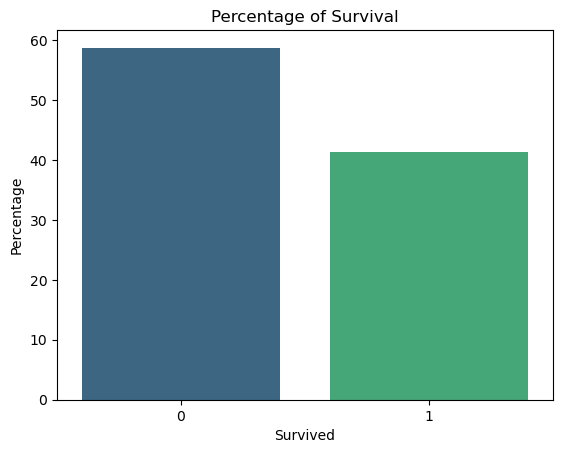

In [19]:
# Analyze the 'survived' column
survived_counts = df['survived'].value_counts(normalize=True) * 100
print("Survived Counts (%):\n", survived_counts)
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.title('Percentage of Survival')
plt.show()

Pclass Distribution (%):
 pclass
3    51.794872
1    27.179487
2    21.025641
Name: proportion, dtype: float64


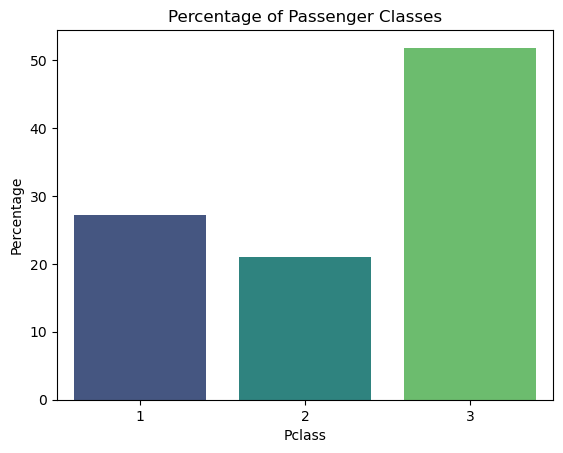

In [20]:
# Analyze the 'pclass' column
pclass_counts = df['pclass'].value_counts(normalize=True) * 100
print("Pclass Distribution (%):\n", pclass_counts)
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette='viridis')
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.title('Percentage of Passenger Classes')
plt.show()

Sex Distribution (%):
 sex
male      62.564103
female    37.435897
Name: proportion, dtype: float64


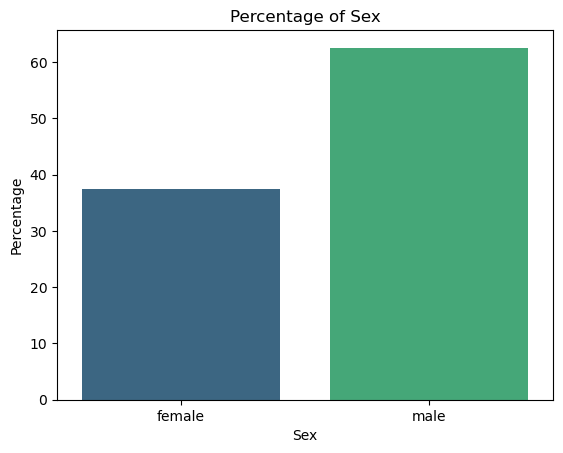

In [21]:
# Analyze the 'sex' column
sex_counts = df['sex'].value_counts(normalize=True) * 100
print("Sex Distribution (%):\n", sex_counts)
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Sex')
plt.show()

Who Distribution (%):
 who
man      57.435897
woman    32.051282
child    10.512821
Name: proportion, dtype: float64


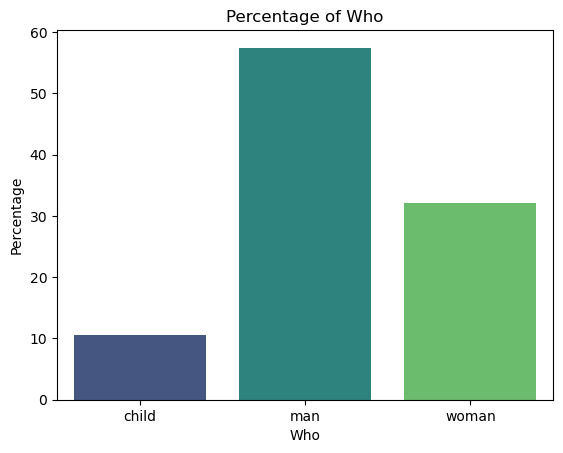

In [22]:
# Analyze the 'who' column
who_counts = df['who'].value_counts(normalize=True) * 100
print("Who Distribution (%):\n", who_counts)
sns.barplot(x=who_counts.index, y=who_counts.values, palette='viridis')
plt.xlabel('Who')
plt.ylabel('Percentage')
plt.title('Percentage of Who')
plt.show()

age_group
20-40    60.897436
41-80    18.846154
16-19     9.743590
0-5       5.512821
6-10      2.564103
11-15     2.435897
Name: proportion, dtype: float64


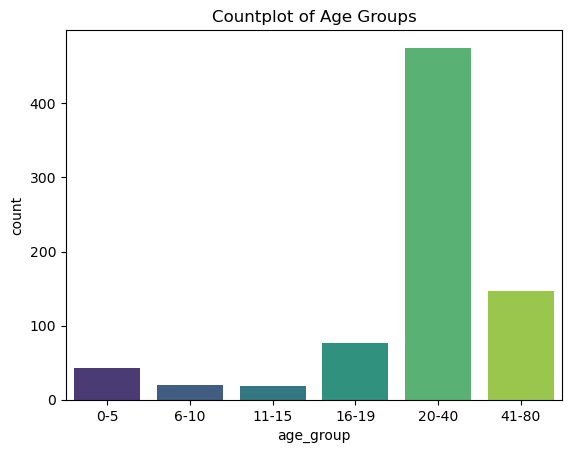

In [23]:
# Analyze the 'age_groups' column
age_group_distribution = df['age_group'].value_counts(normalize=True) * 100
print(age_group_distribution)
sns.countplot(x='age_group', data=df, palette='viridis')
plt.title('Countplot of Age Groups')
plt.show()

Embark Town Distribution (%):
 embark_town
Southampton    72.692308
Cherbourg      19.871795
Queenstown      7.435897
Name: proportion, dtype: float64


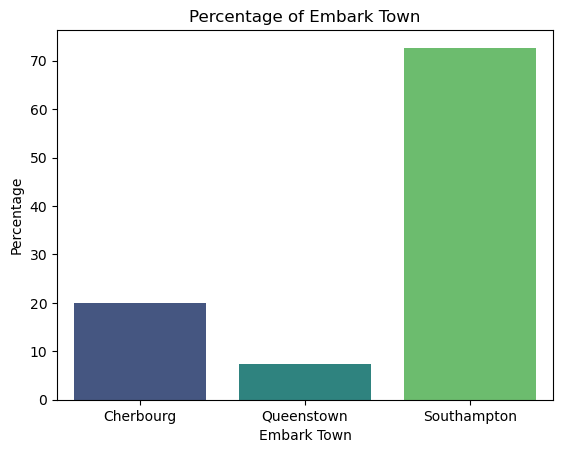

In [24]:
# Analyze the 'embark_town' column
embark_town_counts = df['embark_town'].value_counts(normalize=True) * 100
print("Embark Town Distribution (%):\n", embark_town_counts)
sns.barplot(x=embark_town_counts.index, y=embark_town_counts.values, palette='viridis')
plt.xlabel('Embark Town')
plt.ylabel('Percentage')
plt.title('Percentage of Embark Town')
plt.show()

Alone Distribution (%):
 alone
True     56.666667
False    43.333333
Name: proportion, dtype: float64


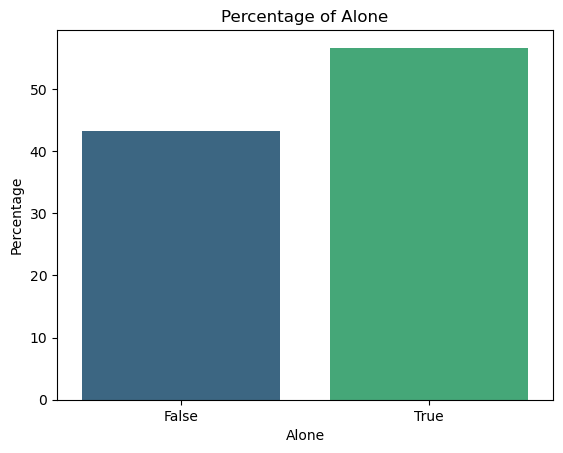

In [25]:
# Analyze the 'alone' column
alone_counts = df['alone'].value_counts(normalize=True) * 100
print("Alone Distribution (%):\n", alone_counts)
sns.barplot(x=alone_counts.index, y=alone_counts.values, palette='viridis')
plt.xlabel('Alone')
plt.ylabel('Percentage')
plt.title('Percentage of Alone')
plt.show()

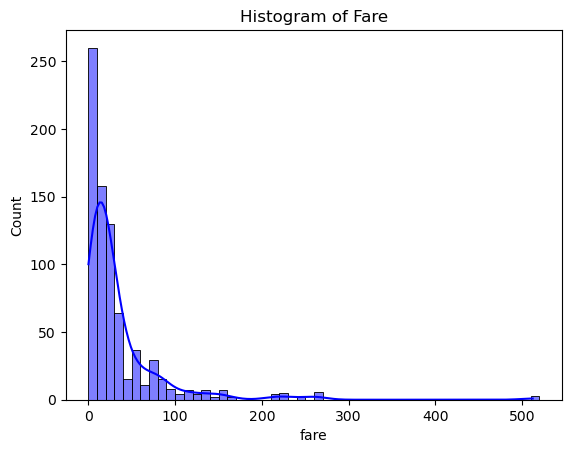

In [26]:
# Analyze the 'fare' column
sns.histplot(df['fare'], kde=True, color='blue', binwidth=10)  # Adjust 'binwidth' as needed
plt.title('Histogram of Fare')
plt.show()

Family Size Distribution (%):
 family_size
0     56.666667
1     19.743590
2     12.948718
3      3.589744
5      2.820513
4      1.666667
6      1.538462
7      0.769231
10     0.256410
Name: proportion, dtype: float64


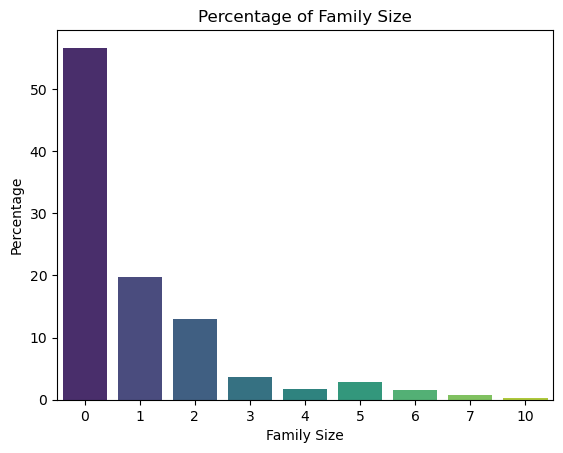

In [27]:
# Analyze the 'family_size' column
family_size_counts = df['family_size'].value_counts(normalize=True) * 100
print("Family Size Distribution (%):\n", family_size_counts)
sns.barplot(x=family_size_counts.index, y=family_size_counts.values, palette='viridis')
plt.xlabel('Family Size')
plt.ylabel('Percentage')
plt.title('Percentage of Family Size')
plt.show()

### Few Observations:

1. Approximately 41.2% of passengers survived.
2. Most passengers were in third class; first class was the least represented.
3. A higher proportion of male passengers compared to females, with females having a higher survival rate.
4. Adults made up the majority of passengers, with children being a smaller group.
5. Most passengers boarded in Southampton.
6. A significant number of passengers traveled alone.
7. Most passengers were aged 20-40 years.
8. The fare distribution is right-skewed, with a few high fares compared to the majority of lower fares.
9. Most passengers traveled with small family groups or alone.

# Step 07 : Bivariate Analysis

survived    0    1
pclass            
1         3.6  6.4
2         4.9  5.1
3         7.4  2.6


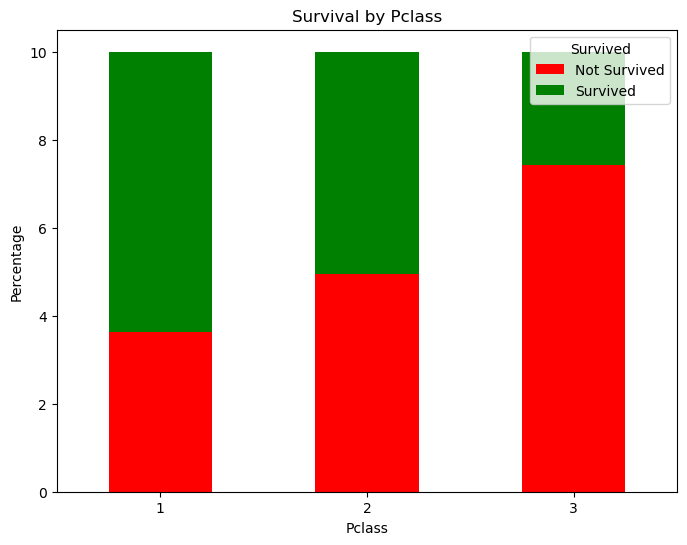

In [28]:
# Analyze survival with respect to 'pclass'
pclass_survival = df.groupby('pclass')['survived'].value_counts(normalize=True).unstack() * 10

print(round(pclass_survival, 1))

ax = pclass_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))

ax.set_xlabel('Pclass')
ax.set_ylabel('Percentage')
ax.set_title('Survival by Pclass')
ax.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

Survival by Sex (%):
 survived          0          1
sex                           
female    26.027397  73.972603
male      78.278689  21.721311


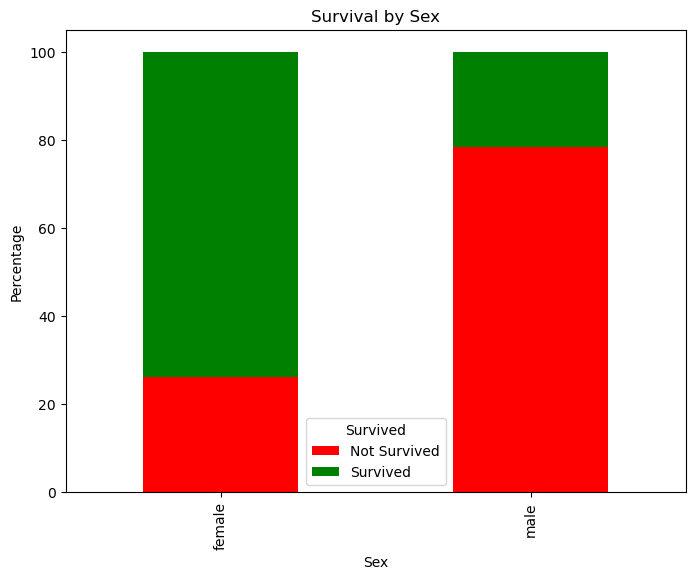

In [29]:
# Analyze survival with respect to 'sex'
sex_survival = df.groupby('sex')['survived'].value_counts(normalize=True).unstack() * 100
print("Survival by Sex (%):\n", sex_survival)
sex_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Survival by Sex')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Survival by Who (%):
 survived          0          1
who                           
child     41.463415  58.536585
man       81.026786  18.973214
woman     24.400000  75.600000


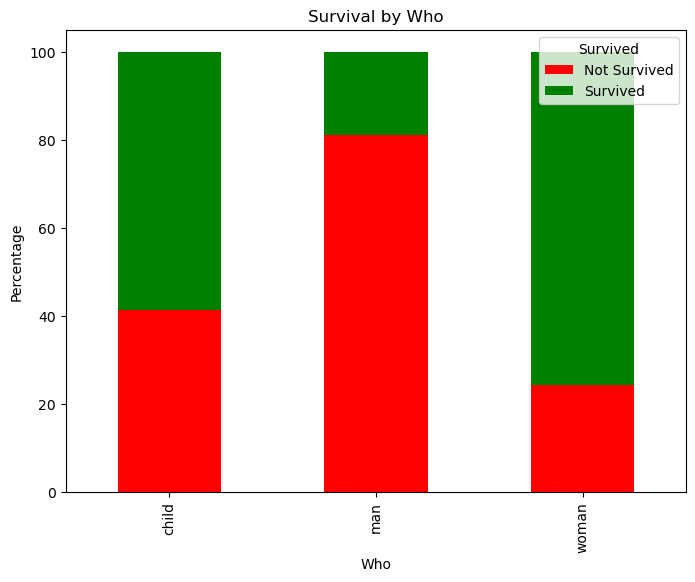

In [30]:
# Analyze survival with respect to 'who'
who_survival = df.groupby('who')['survived'].value_counts(normalize=True).unstack() * 100
print("Survival by Who (%):\n", who_survival)
who_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.xlabel('Who')
plt.ylabel('Percentage')
plt.title('Survival by Who')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Survival by Embark Town (%):
 survived             0          1
embark_town                      
Cherbourg    41.935484  58.064516
Queenstown   65.517241  34.482759
Southampton  62.610229  37.389771


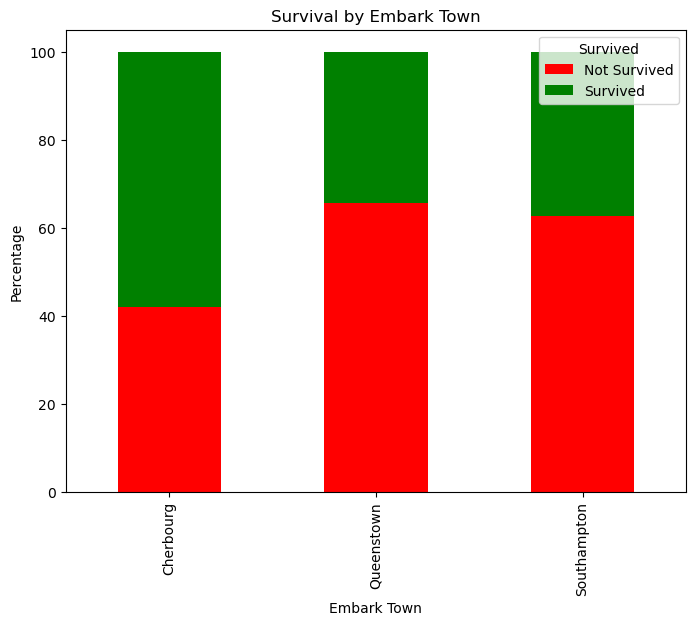

In [31]:
# Analyze survival with respect to 'embark_town'
embark_town_survival = df.groupby('embark_town')['survived'].value_counts(normalize=True).unstack() * 100
print("Survival by Embark Town (%):\n", embark_town_survival)
embark_town_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.xlabel('Embark Town')
plt.ylabel('Percentage')
plt.title('Survival by Embark Town')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Survival by Alone (%):
 survived          0          1
alone                         
False     48.816568  51.183432
True      66.289593  33.710407


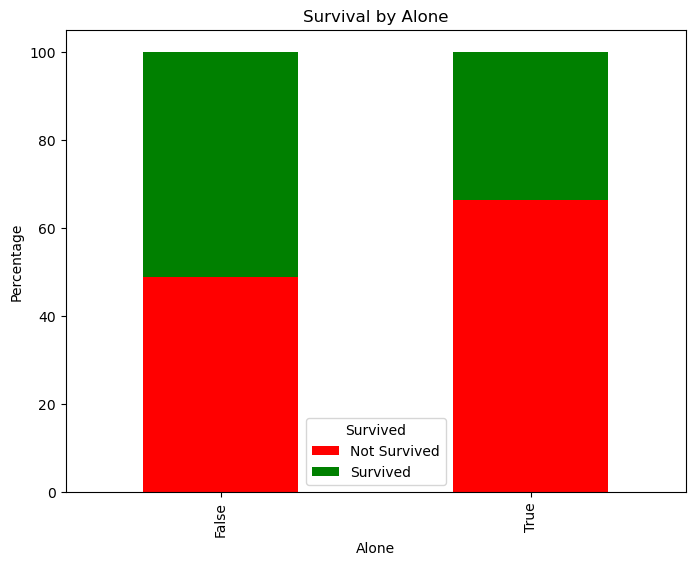

In [32]:
# Analyze survival with respect to 'alone'
alone_survival = df.groupby('alone')['survived'].value_counts(normalize=True).unstack() * 100
print("Survival by Alone (%):\n", alone_survival)

# Alternative plot using a bar plot with percentage
alone_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.xlabel('Alone')
plt.ylabel('Percentage')
plt.title('Survival by Alone')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Survival by Family Size (%):
 survived              0          1
family_size                       
0             66.289593  33.710407
1             44.805195  55.194805
2             42.574257  57.425743
3             28.571429  71.428571
4             76.923077  23.076923
5             86.363636  13.636364
6             66.666667  33.333333
7            100.000000        NaN
10           100.000000        NaN


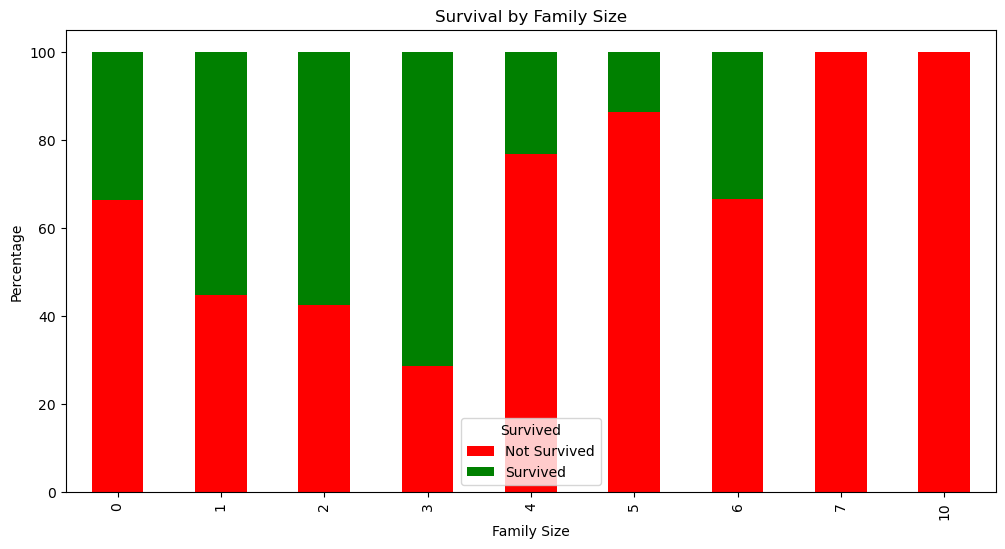

In [33]:
# Analyze survival with respect to 'family_size'
family_size_survival = df.groupby('family_size')['survived'].value_counts(normalize=True).unstack() * 100
print("Survival by Family Size (%):\n", family_size_survival)
family_size_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))
plt.xlabel('Family Size')
plt.ylabel('Percentage')
plt.title('Survival by Family Size')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

### Few Observations:

1. Survival rates are higher in first class and lower in third class.
2. Females have higher survival rates compared to males.
3. Children have a higher survival rate than adults.
4. Passengers from Cherbourg have a higher survival rate compared to those from Southampton and Queenstown.
5. Passengers traveling alone have varied survival rates compared to those traveling with family.
6. Family size has a mixed effect on survival, with varying survival rates for different family sizes.

# Step 08 : Multivariate Analysis

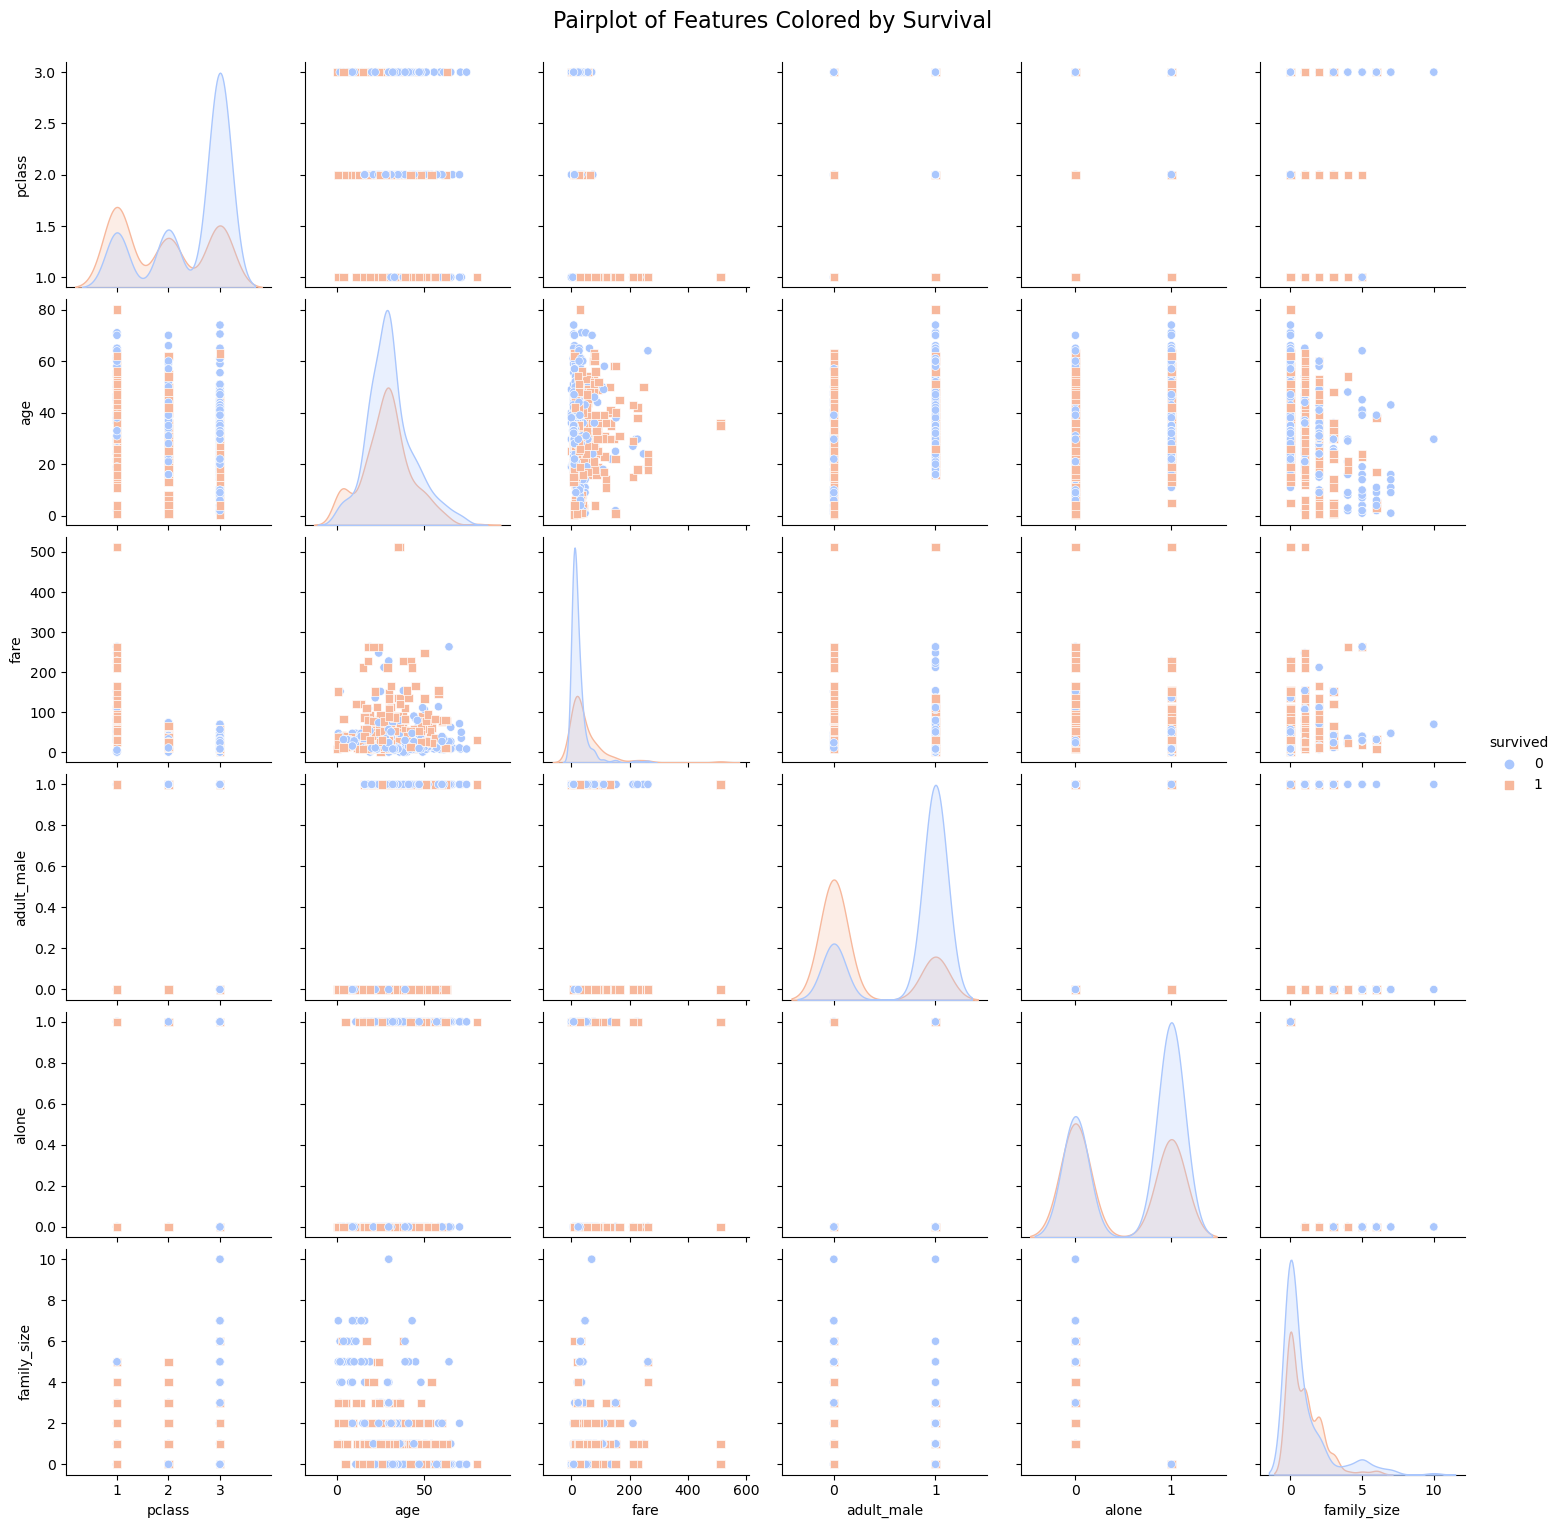

In [34]:
# Create pairplot of features colored by survival status
sns.pairplot(df, hue='survived', palette='coolwarm', markers=['o', 's'])
plt.suptitle('Pairplot of Features Colored by Survival', y=1.02, fontsize=16)
plt.show()

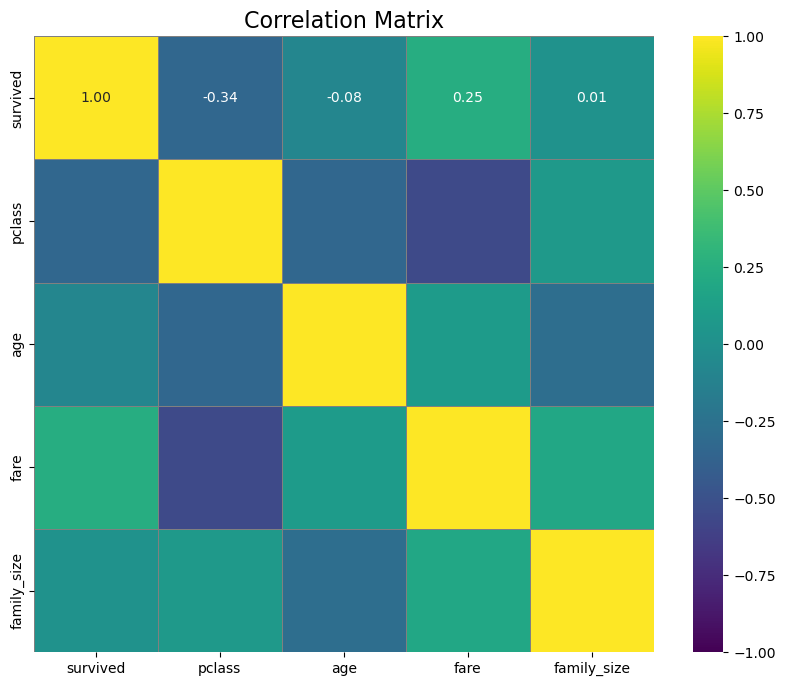

In [35]:
# Compute and display the correlation matrix 
corr = df[['survived', 'pclass', 'age', 'fare', 'family_size']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### Few Observations:

1. Higher fares tend to be associated with a higher chance of survival.
2. First-class passengers generally have better survival rates compared to lower classes.
3. The relationship between age and survival is less pronounced, but younger individuals might have slightly higher survival rates.
4. A weak positive correlation suggests that higher fares are slightly associated with better survival chances.
5. A moderate negative correlation indicates that lower classes have a higher likelihood of not surviving.
6. Minimal correlation, suggesting age does not strongly influence survival.
7. Very weak correlation, implying family size has little effect on survival chances.

# Step 09 : Removing Outliers

In [36]:

# Compute Q1 and Q3 using numpy functions
Q1 = np.percentile(df['fare'], 25)
Q3 = np.percentile(df['fare'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the DataFrame
df_filtered = df.query('fare > @lower_bound and fare < @upper_bound')

print(df_filtered.shape)

(683, 12)


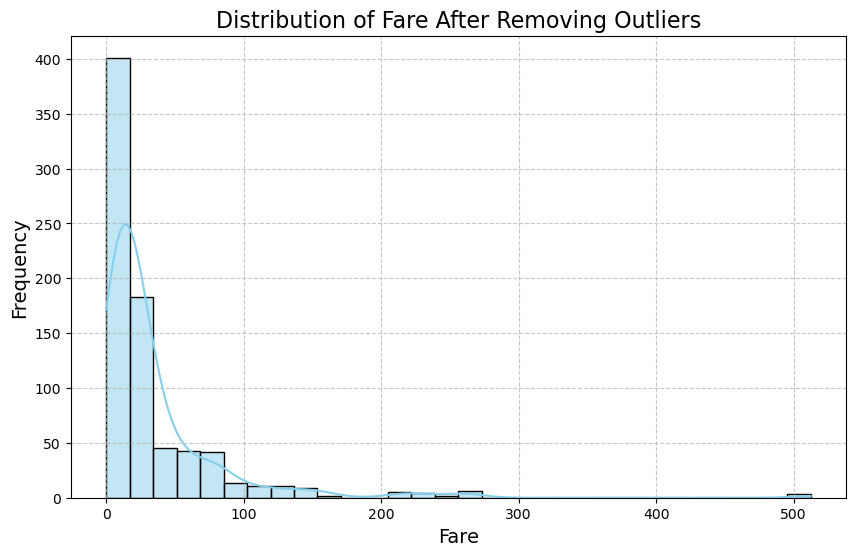

In [37]:
# Plot the distribution of 'fare' after removing outliers
plt.figure(figsize=(10, 6))

sns.histplot(df['fare'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Fare After Removing Outliers', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()